In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image
from skimage.io import imread
import cv2

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
import seaborn as sns


# Load The Training Data

In [2]:
train = pd.read_csv('../data/gtsrb-german-traffic-sign/Train.csv')
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


# Load The Test Data

In [3]:
test = pd.read_csv('../data/gtsrb-german-traffic-sign/Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


# Attach Training images with classes

In [4]:
train_x=[]

directory ='../data/gtsrb-german-traffic-sign/'

for i in train['Path']:
    try:
        
        img = Image.fromarray(cv2.imread(directory + i), 'RGB')
        train_x.append(np.array(img.resize((32, 32))))
              
    except AttributeError:
        print("Error in loading image")
        


In [5]:
train_x = np.array(train_x)
train_x.shape

(39209, 32, 32, 3)

In [6]:
train_y = np.array(train['ClassId'].values)
train_y.shape

(39209,)

# Number of images per class in train data

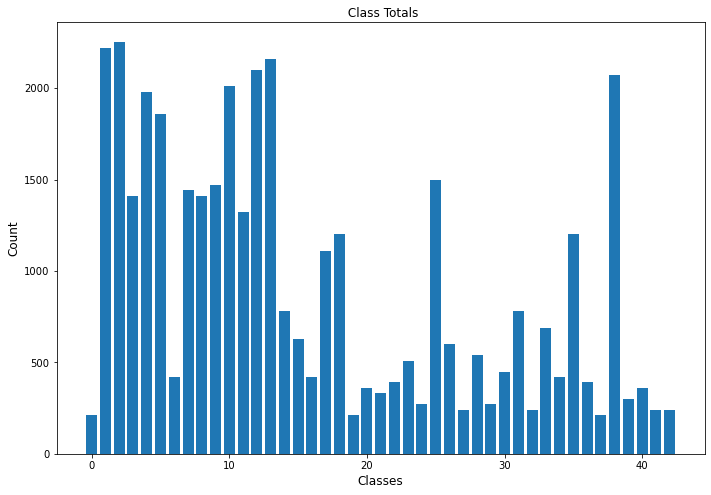

In [7]:
unique_class, counts_class = np.unique(train_y, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax.bar(unique_class,counts_class)

ax.set_xlabel('Classes', fontsize='large')
ax.set_ylabel('Count', fontsize='large')

ax.set_title(' Class Totals', fontsize='large', pad=5)


plt.show()

# Attach Test images with classes

In [8]:
test_x = []

directory = '../data/gtsrb-german-traffic-sign/'

for i in test['Path']:
    try:
        img = Image.fromarray(cv2.imread(directory + i), 'RGB')
        test_x.append(np.array(img.resize((32, 32))))
        
    except AttributeError:
        print("Error in loading image")


In [9]:
test_x = np.array(test_x)
test_x.shape

(12630, 32, 32, 3)

In [10]:
test_y = np.array(test['ClassId'].values)
test_y.shape

(12630,)

# Resize

In [11]:
train_x.resize(39209,3072)
test_x.resize(12630,3072)

# Normalize

In [12]:
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

# Model Compare Scores DataFrame

In [13]:
df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)'])

## KNeighbors Classifier

In [14]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)

KNeighborsClassifier()

In [15]:
y_pred = model.predict(test_x)

In [16]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.40      0.31        60
           1       0.34      0.35      0.34       720
           2       0.28      0.26      0.27       750
           3       0.12      0.17      0.14       450
           4       0.31      0.34      0.32       660
           5       0.18      0.33      0.23       630
           6       0.49      0.35      0.41       150
           7       0.23      0.33      0.27       450
           8       0.29      0.32      0.30       450
           9       0.51      0.30      0.38       480
          10       0.54      0.60      0.57       660
          11       0.53      0.30      0.38       420
          12       0.70      0.55      0.62       690
          13       0.83      0.87      0.85       720
          14       0.93      0.32      0.48       270
          15       0.36      0.27      0.31       210
          16       0.50      0.67      0.57       150
          17       0.93    

In [17]:
print(metrics.accuracy_score(y_pred, test_y))

0.3929532858273951


# Calculate recall, precision, f1 score and accuracy 

In [18]:
recall_Kneigh = metrics.recall_score(test_y, y_pred, average='macro')
df_scores.loc[len(df_scores)] = ["Kneigh","Recall", recall_Kneigh]

precision_Kneigh = metrics.precision_score(test_y, y_pred, average='macro')
df_scores.loc[len(df_scores)] = ["Kneigh","Precision", precision_Kneigh]

f1_Kneigh = metrics.f1_score(test_y, y_pred, average='macro')
df_scores.loc[len(df_scores)] = ["Kneigh","F1", f1_Kneigh]

acc_Kneigh = metrics.accuracy_score(test_y, y_pred)
df_scores.loc[len(df_scores)] = ["Kneigh","Accuracy", acc_Kneigh]

df_model.loc[len(df_model)] = ["Kneigh", acc_Kneigh*100 ]
acc_Kneigh

0.3929532858273951

In [19]:
df_model

,Model,Accuracy (%)
0,Kneigh,39.295329


In [20]:
df_scores

,Model,Score,Value
0,Kneigh,Recall,0.337397
1,Kneigh,Precision,0.387503
2,Kneigh,F1,0.346867
3,Kneigh,Accuracy,0.392953


## Logistic Regression

In [21]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 80)
lr.fit(train_x, train_y)

/Users/stay_one/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=80, multi_class='multinomial')

In [22]:
y_pred_logistic = lr.predict(test_x)

In [23]:
print(classification_report(test_y, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        60
           1       0.74      0.86      0.79       720
           2       0.83      0.86      0.84       750
           3       0.82      0.78      0.79       450
           4       0.84      0.81      0.83       660
           5       0.77      0.81      0.79       630
           6       0.90      0.63      0.74       150
           7       0.84      0.68      0.75       450
           8       0.76      0.83      0.79       450
           9       0.91      0.91      0.91       480
          10       0.90      0.94      0.92       660
          11       0.88      0.90      0.89       420
          12       0.96      0.96      0.96       690
          13       0.97      0.98      0.97       720
          14       0.98      0.89      0.93       270
          15       0.80      0.76      0.78       210
          16       0.83      0.92      0.87       150
          17       0.95    

In [24]:
print(metrics.accuracy_score(y_pred_logistic, test_y))

0.8444180522565321


# Calculate recall, precision, f1 score and accuracy 

In [45]:
recall_logistic = metrics.recall_score(test_y, y_pred_logistic, average='macro')
df_scores.loc[len(df_scores)] = ["logistic","Recall", recall_logistic]

precision_logistic = metrics.precision_score(test_y, y_pred_logistic, average='macro')
df_scores.loc[len(df_scores)] = ["logistic","Precision", precision_logistic]

f1_logistic = metrics.f1_score(test_y, y_pred_logistic, average='macro')
df_scores.loc[len(df_scores)] = ["logistic","F1", f1_logistic]

acc_logistic = metrics.accuracy_score(test_y, y_pred_logistic)
df_scores.loc[len(df_scores)] = ["logistic","Accuracy", acc_logistic]

df_model.loc[len(df_model)] = ["logistic", acc_logistic*100 ]
acc_logistic

0.8444180522565321

In [26]:
df_model

,Model,Accuracy (%)
0,Kneigh,39.295329
1,logistic,84.441805


In [46]:
df_scores

,Model,Score,Value
0,Kneigh,Recall,0.337397
1,Kneigh,Precision,0.387503
2,Kneigh,F1,0.346867
3,Kneigh,Accuracy,0.392953
4,logistic,Recall,0.337397
5,logistic,Precision,0.387503
6,logistic,F1,0.346867
7,logistic,Accuracy,0.844418
8,SVM,Recall,0.745271
9,SVM,Precision,0.783737


In [48]:
df_scores.drop([4,5,6,7],inplace=True)
df_scores

,Model,Score,Value
0,Kneigh,Recall,0.337397
1,Kneigh,Precision,0.387503
2,Kneigh,F1,0.346867
3,Kneigh,Accuracy,0.392953
8,SVM,Recall,0.745271
9,SVM,Precision,0.783737
10,SVM,F1,0.753691
11,SVM,Accuracy,0.825653
12,RF,Accuracy,0.796675
13,RF,Recall,0.701531


## Support Vector Machine 

In [28]:
svm = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)
svm.fit(train_x, train_y)

NuSVC(gamma=1e-05, nu=0.05, random_state=121)

In [29]:
y_pred_svm = svm.predict(test_x)


## Calculating recall, precision, f1 score and accuracy 

In [30]:

recall_svm = metrics.recall_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Recall",recall_svm]

precision_svm = metrics.precision_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Precision",precision_svm]

f1_svm = metrics.f1_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","F1",f1_svm]

acc_svm=metrics.accuracy_score(test_y,y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM","Accuracy",acc_svm]

df_model.loc[len(df_model)] = ["SVM",acc_svm*100]
acc_svm

NameError: name 'time_svm' is not defined

In [31]:
#df_model.loc[len(df_model)] = ["SVM",acc_svm*100]
acc_svm

0.8256532066508313

In [32]:
print("Classification report for SVM classifier %s:\n%s\n"
      % (svm, metrics.classification_report(test_y, y_pred_svm)))

Classification report for SVM classifier NuSVC(gamma=1e-05, nu=0.05, random_state=121):
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        60
           1       0.74      0.91      0.82       720
           2       0.82      0.91      0.86       750
           3       0.69      0.81      0.74       450
           4       0.78      0.81      0.79       660
           5       0.77      0.84      0.80       630
           6       0.67      0.47      0.55       150
           7       0.90      0.76      0.82       450
           8       0.86      0.85      0.85       450
           9       0.93      0.84      0.88       480
          10       0.91      0.95      0.93       660
          11       0.85      0.91      0.88       420
          12       0.92      0.91      0.92       690
          13       0.97      0.98      0.97       720
          14       0.94      0.88      0.91       270
          15       0.86      0.82      0.84    

In [33]:
df_model

,Model,Accuracy (%)
0,Kneigh,39.295329
1,logistic,84.441805
2,SVM,82.565321


In [34]:
df_scores

,Model,Score,Value
0,Kneigh,Recall,0.337397
1,Kneigh,Precision,0.387503
2,Kneigh,F1,0.346867
3,Kneigh,Accuracy,0.392953
4,logistic,Recall,0.337397
5,logistic,Precision,0.387503
6,logistic,F1,0.346867
7,logistic,Accuracy,0.844418
8,SVM,Recall,0.745271
9,SVM,Precision,0.783737


## Random Forest

In [35]:
y_pred_list=[]
tree_list = [50,100,200,300,500]

rf_accuracy=[]

for n in tree_list:
    
    rf = RandomForestClassifier(n_estimators=n, random_state=121,criterion='entropy')
    rf.fit(train_x, train_y)
   
    y_pred_list.append(rf.predict(test_x))
    
    rf_accuracy.append(metrics.accuracy_score(test_y,rf.predict(test_x)))

In [36]:
rf_accuracy

[0.7745051464766429,
 0.7878068091844814,
 0.793507521773555,
 0.7966745843230404,
 0.798258115597783]

# Best Random Forest model

In [37]:
rf_clf = RandomForestClassifier(n_estimators=300,criterion='entropy')
y_pred_rf = y_pred_list[3]


acc_rf = rf_accuracy[3]
df_scores.loc[len(df_scores)] = ["RF","Accuracy",acc_rf]

df_model.loc[len(df_model)] = ["RF", acc_rf*100]
acc_rf

0.7966745843230404

# Calculating recall, precision and f1 score 

In [38]:
recall_rf = metrics.recall_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Recall",recall_rf]

precision_rf = metrics.precision_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Precision",precision_rf]

f1_rf = metrics.f1_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","F1",f1_rf]


In [39]:
print("Classification report for RF classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(test_y, y_pred_rf)))

Classification report for RF classifier RandomForestClassifier(criterion='entropy', n_estimators=300):
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        60
           1       0.71      0.86      0.78       720
           2       0.61      0.77      0.68       750
           3       0.63      0.71      0.67       450
           4       0.73      0.80      0.76       660
           5       0.59      0.63      0.61       630
           6       0.69      0.56      0.62       150
           7       0.73      0.76      0.75       450
           8       0.72      0.56      0.63       450
           9       0.88      0.87      0.87       480
          10       0.90      0.96      0.93       660
          11       0.86      0.96      0.91       420
          12       0.97      0.92      0.95       690
          13       0.97      0.99      0.98       720
          14       0.98      1.00      0.99       270
          15       0.99      0.7

In [40]:
df_model

,Model,Accuracy (%)
0,Kneigh,39.295329
1,logistic,84.441805
2,SVM,82.565321
3,RF,79.667458


In [41]:
df_scores

,Model,Score,Value
0,Kneigh,Recall,0.337397
1,Kneigh,Precision,0.387503
2,Kneigh,F1,0.346867
3,Kneigh,Accuracy,0.392953
4,logistic,Recall,0.337397
5,logistic,Precision,0.387503
6,logistic,F1,0.346867
7,logistic,Accuracy,0.844418
8,SVM,Recall,0.745271
9,SVM,Precision,0.783737


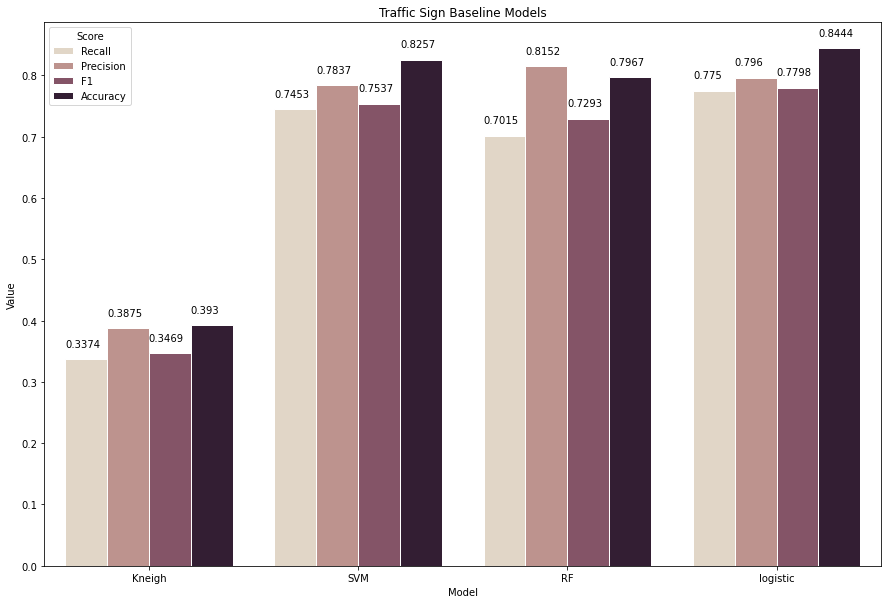

In [49]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes()
ax = sns.barplot(x="Model", y="Value", hue="Score", data=df_scores, palette="ch:.25",edgecolor="1")
ax.set_title('Traffic Sign Baseline Models')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.02,str(round((i.get_height()), 4)), fontsize=10)

plt.savefig('comparing.png')
plt.show() 